In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, random, shutil
import tensorflow as tf
import seaborn
from tensorflow import keras
from tensorflow.keras import preprocessing, layers
from tensorflow.keras.callbacks import EarlyStopping
from keras_preprocessing import image

In [ ]:
import pickle
with open("/content/drive/MyDrive/Colab Notebooks/ellip_lst", "rb") as fp:   # Unpickling
  ellip = pickle.load(fp)
with open("/content/drive/MyDrive/Colab Notebooks/len_lst", "rb") as fp:   # Unpickling
  len = pickle.load(fp)
with open("/content/drive/MyDrive/Colab Notebooks/spiral_lst", "rb") as fp:   # Unpickling
  spiral = pickle.load(fp)

In [ ]:
def _proc_images(src, dst, label, arr, siz):
    train_dir = os.path.join(dst, 'train')
    val_dir = os.path.join(dst, 'validation')
    test_dir = os.path.join(dst, 'test')
    
    train_dest = os.path.join(train_dir, label)
    val_dest   = os.path.join(val_dir, label)
    test_dest   = os.path.join(test_dir, label)
    
    if not os.path.exists(train_dest):
        os.makedirs(train_dest)

    if not os.path.exists(val_dest):
        os.makedirs(val_dest)
      
    if not os.path.exists(test_dest):
        os.makedirs(test_dest)

    x = int(siz*0.2)
    x1 = int(siz*0.8)
    for i in arr[0:x]:
        shutil.copyfile(os.path.join(src, str(i)), os.path.join(train_dest, str(i)))
    for i in arr[x:x1]:
        shutil.copyfile(os.path.join(src, str(i)), os.path.join(val_dest, str(i)))
    for i in arr[:x]:
        shutil.copyfile(os.path.join(src, str(i)), os.path.join(test_dest, str(i)))
    
    print(label, 'done!')

In [ ]:
_proc_images('/content/drive/MyDrive/Colab Notebooks/classified_images/elliptical/', '/content/galaxy/data/', 'elliptical',ellip, 2297)
_proc_images('/content/drive/MyDrive/Colab Notebooks/classified_images/lenticular/','/content/galaxy/data/', 'lenticular',len, 47)
_proc_images('/content/drive/MyDrive/Colab Notebooks/classified_images/spiral/', '/content/galaxy/data/', 'spiral',spiral, 758)

elliptical done!
lenticular done!
spiral done!


In [ ]:
def _proc_images1(src, dst, label, arr, siz):
    train_dir = os.path.join(dst, 'train')
    val_dir = os.path.join(dst, 'validation')
    test_dir = os.path.join(dst, 'test')
    
    train_dest = os.path.join(train_dir, label)
    val_dest   = os.path.join(val_dir, label)
    test_dest   = os.path.join(test_dir, label)
    
    if not os.path.exists(train_dest):
        os.makedirs(train_dest)

    if not os.path.exists(val_dest):
        os.makedirs(val_dest)
      
    if not os.path.exists(test_dest):
        os.makedirs(test_dest)

    x = int(siz*0.6)
    x1 = int(siz*0.8)
    for i in arr[0:x]:
        shutil.copyfile(os.path.join(src, str(i)+'.jpg'), os.path.join(train_dest, str(i)+'.jpg'))
    for i in arr[x:x1]:
        shutil.copyfile(os.path.join(src, str(i)+'.jpg'), os.path.join(val_dest, str(i)+'.jpg'))
    # for i in arr[x1:]:
    #     shutil.copyfile(os.path.join(src, str(i)), os.path.join(test_dest, str(i)))
    
    print(label, 'done!')

In [ ]:
_proc_images1(training_images, '/content/galaxy/data/', 'elliptical', ellipticals, 7311)
_proc_images1(training_images,'/content/galaxy/data/', 'lenticular', lenticulars, 6625)
_proc_images1(training_images, '/content/galaxy/data/', 'spiral', spirals, 4635)

elliptical done!
lenticular done!
spiral done!


In [ ]:
my_data = "/content/galaxy/data/"

In [ ]:
train_dir = '/content/galaxy/data/train'
validation_dir = '/content/galaxy/data/validation'
test_dir = '/content/galaxy/data/test'

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1.0/255,
                    )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(227,227),
                                                    batch_size=128,
                                                    shuffle=True,
                                                    class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=(227,227),
                                                         batch_size=64,
                                                         shuffle=True,
                                                         class_mode='categorical')
test_generator = train_datagen.flow_from_directory(test_dir,
                                                         target_size=(227,227),
                                                         batch_size=64,
                                                         shuffle=False,
                                                         class_mode='categorical')

Found 619 images belonging to 3 classes.


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
image_shape=(227,227,3)

In [ ]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3),activation='relu', padding='valid', input_shape=image_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),

    tf.keras.layers.Conv2D(64, (3,3),activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
    
    tf.keras.layers.Conv2D(64, (3,3),activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),

    tf.keras.layers.Conv2D(64, (3,3),activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
    

    # flatten the image pixels
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(2048, input_shape=(227*227*3,), activation='relu'),

    tf.keras.layers.Dropout(0.5),

    # 3 neuron fully connected hidden layer
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 225, 225, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 64)        3

In [ ]:

from keras.callbacks import EarlyStopping
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

In [ ]:
model.compile(  loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
%time
history=model.fit(train_generator, batch_size=128, steps_per_epoch=25 ,epochs=50, validation_data=validation_generator, verbose=1, callbacks = [earlystopper])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.3 µs
Epoch 1/50
25/25 [==============================] - 488s 19s/step - loss: 0.4682 - accuracy: 0.8125 - val_loss: 0.8815 - val_accuracy: 0.6984
Epoch 2/50
25/25 [==============================] - 515s 21s/step - loss: 0.3569 - accuracy: 0.8575 - val_loss: 0.6170 - val_accuracy: 0.7113
Epoch 3/50
25/25 [==============================] - 491s 20s/step - loss: 0.3209 - accuracy: 0.8691 - val_loss: 0.5608 - val_accuracy: 0.7452
Epoch 4/50
25/25 [==============================] - 491s 20s/step - loss: 0.2991 - accuracy: 0.8769 - val_loss: 0.5311 - val_accuracy: 0.7548
Epoch 5/50
25/25 [==============================] - 494s 20s/step - loss: 0.2713 - accuracy: 0.8834 - val_loss: 0.4886 - val_accuracy: 0.7710
Epoch 6/50
25/25 [==============================] - 494s 20s/step - loss: 0.2687 - accuracy: 0.8909 - val_loss: 0.4841 - val_accuracy: 0.7903
Epoch 7/50
25/25 [==============================] - 493s 20s/step - loss: 0.2639 - a

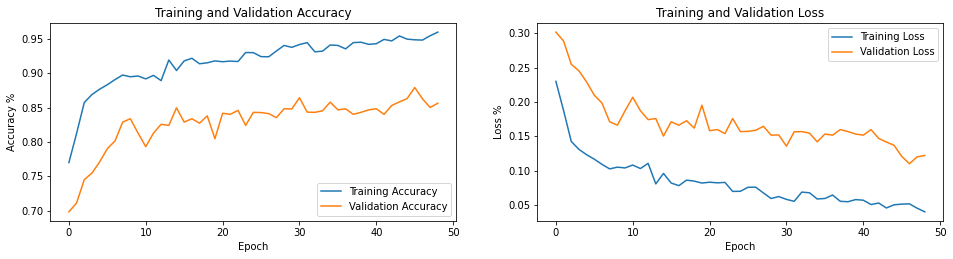

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range =range(len(acc))  #range for the number of epochs

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss %')
plt.title('Training and Validation Loss')
plt.savefig('./plots-v2.png')
plt.show()


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.2299,0.7701,0.3016,0.6984,0
1,0.1875,0.8125,0.2887,0.7113,1
2,0.1425,0.8575,0.2548,0.7452,2
3,0.1309,0.8691,0.2452,0.7548,3
4,0.1231,0.8769,0.2290,0.7710,4
5,0.1166,0.8834,0.2097,0.7903,5
6,0.1091,0.8909,0.1984,0.8016,6
7,0.1025,0.8975,0.1710,0.8290,7
8,0.1050,0.8950,0.1661,0.8339,8
9,0.1039,0.8961,0.1871,0.8129,9
